# Bibliotecas e *drives*

In [4]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

*acessando minha pasta do Gdrive onde estão as informações que preciso*

In [7]:
#acessando a pasta
%cd /content/drive/My\ Drive/Colab\ Notebooks/covid19

/content/drive/My Drive/Colab Notebooks/covid19


In [8]:
!ls #verificando o conteudo da pasta

 API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 brasil_20200324.csv
 brasil_20200326.csv
 Brasil_20200327.html
 Brasil_covid19-calor.html
 Brasil_covid19.html
 casos_100mil-2020.08.05.png
 covid19AmericaLatina-script.ipynb
 covid19BrazilCelular-script.ipynb
 covid19Brazil-script.ipynb
 covid19-script.ipynb
 covid19-scripts-trash.ipynb
 covid19-SEIR.ipynb
'Documento sem título.gdoc'
 estimativa_brasil-2020.08.05.png
 evolução-global-2020.08.05.png
 full_data_20200320.csv
 full_data_20200321.csv
 full_data_20200322.csv
 full_data_20200323.csv
 full_data_20200326.csv
 Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 mobilidade-2020.07.31.png
 novos-casos-global-2020.08.05.png
 taxa-mortes-global-2020.08.05.png
 teste.png


# Carregando o banco de dados

In [30]:
url='https://covid.ourworldindata.org/data/ecdc/full_data.csv'
data = requests.get(url).content
full_df = pd.read_csv(io.StringIO(data.decode('utf-8')))

pop_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv', error_bad_lines=False)

full_df.head()

b'Skipping line 23: expected 66 fields, saw 67\nSkipping line 43: expected 66 fields, saw 67\nSkipping line 44: expected 66 fields, saw 67\nSkipping line 67: expected 66 fields, saw 67\nSkipping line 79: expected 66 fields, saw 67\nSkipping line 86: expected 66 fields, saw 67\nSkipping line 96: expected 66 fields, saw 67\nSkipping line 112: expected 66 fields, saw 67\nSkipping line 126: expected 66 fields, saw 67\nSkipping line 146: expected 66 fields, saw 67\nSkipping line 193: expected 66 fields, saw 67\nSkipping line 254: expected 66 fields, saw 67\nSkipping line 262: expected 66 fields, saw 67\n'


,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [34]:
df = full_df[full_df['location']=='Venezuela']
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
33778,2020-03-15,Venezuela,10.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN
33779,2020-03-16,Venezuela,5.0,0.0,15.0,0.0,NaN,NaN,NaN,NaN
33780,2020-03-17,Venezuela,18.0,0.0,33.0,0.0,NaN,NaN,NaN,NaN
33781,2020-03-18,Venezuela,0.0,0.0,33.0,0.0,NaN,NaN,NaN,NaN
33782,2020-03-19,Venezuela,0.0,0.0,33.0,0.0,NaN,NaN,NaN,NaN


In [67]:
brazil_df = full_df[full_df['location']=='Brazil']
bolivia_df = full_df[full_df['location']=='Bolivia']
peru_df = full_df[full_df['location']=='Peru']
paraguai_df = full_df[full_df['location']=='Paraguay']
argentina_df = full_df[full_df['location'] == 'Argentina']
uruguai_df = full_df[full_df['location'] == 'Uruguay']
venezuela_df = full_df[full_df['location']=='Venezuela']
colombia_df = full_df[full_df['location']=='Colombia']
chile_df = full_df[full_df['location'] == 'Chile']

In [68]:
brazil_df = brazil_df[brazil_df['total_cases'] != 0].reset_index()
bolivia_df = bolivia_df[bolivia_df['total_cases'] != 0].reset_index()
peru_df = peru_df[peru_df['total_cases'] != 0].reset_index()
paraguai_df = paraguai_df[paraguai_df['total_cases'] != 0].reset_index()
argentina_df = argentina_df[argentina_df['total_cases'] != 0].reset_index()
uruguai_df = uruguai_df[uruguai_df['total_cases'] != 0].reset_index()
venezuela_df = venezuela_df[venezuela_df['total_cases'] != 0].reset_index()
colombia_df = colombia_df[colombia_df['total_cases'] != 0].reset_index()
chile_df = chile_df[chile_df['total_cases'] != 0].reset_index()

In [70]:
pop_df[pop_df.index == 'Uruguay']


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Uruguay,URY,Population,total,SP.POP.TOTL,2538643.0,2571681.0,2603882.0,2635126.0,2665388.0,2694536.0,2722875.0,2750086.0,2774759.0,2795042.0,2809793.0,2818281.0,2821461.0,2822117.0,2824095.0,2830176.0,2841372.0,2856958.0,2875728.0,2895688.0,2915389.0,2934613.0,2953852.0,2973036.0,2992246.0,3011519.0,3030649.0,3049581.0,3068705.0,3088595.0,3109601.0,3131660.0,3154464.0,3177745.0,3201151.0,3224281.0,3247381.0,3270164.0,3291053.0,3308012.0,3319736.0,3325473.0,3326040.0,3323668.0,3321476.0,3321803.0,3325401.0,3331749.0,3340221.0,3349676.0,3359275.0,3368934.0,3378974.0,3389439.0,3400434.0,3412009.0,3424132.0,3436646.0,3449299.0,NaN,NaN


In [71]:
#population in 2018, par 100,000
brazil_df['Pop'] = 209_469_333/100_000
bolivia_df['Pop'] = 11_353_142/100_000
peru_df['Pop'] = 31_989_256/100_000
paraguai_df['Pop'] = 6_956_071/100_000
argentina_df['Pop'] = 44_494_502/100_000
uruguai_df['Pop'] = 3_449_299/100_000
venezuela_df['Pop'] = 31_703_499/100_000
colombia_df['Pop'] = 49_648_685/100_000
chile_df['Pop'] = 18_729_160/100_000

In [72]:
brazil_df['Cases'] = brazil_df['total_cases']/brazil_df['Pop']
bolivia_df['Cases'] = bolivia_df['total_cases']/bolivia_df['Pop']
peru_df['Cases'] = peru_df['total_cases']/peru_df['Pop']
paraguai_df['Cases'] = paraguai_df['total_cases']/paraguai_df['Pop']
argentina_df['Cases'] = argentina_df['total_cases']/argentina_df['Pop']
venezuela_df['Cases'] = venezuela_df['total_cases']/venezuela_df['Pop']
uruguai_df['Cases'] = uruguai_df['total_cases']/uruguai_df['Pop']
colombia_df['Cases'] = colombia_df['total_cases']/colombia_df['Pop']
chile_df['Cases'] = chile_df['total_cases']/chile_df['Pop']

In [73]:
uruguai_df

,index,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,Pop,Cases
0,33344,2020-03-15,Uruguay,6.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,34.49299,0.173948
1,33345,2020-03-16,Uruguay,2.0,0.0,8.0,0.0,NaN,NaN,NaN,NaN,34.49299,0.231931
2,33346,2020-03-17,Uruguay,21.0,0.0,29.0,0.0,NaN,NaN,NaN,NaN,34.49299,0.840751
3,33347,2020-03-18,Uruguay,21.0,0.0,50.0,0.0,NaN,NaN,NaN,NaN,34.49299,1.449570
4,33348,2020-03-19,Uruguay,29.0,0.0,79.0,0.0,NaN,NaN,NaN,NaN,34.49299,2.290320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,33483,2020-08-01,Uruguay,21.0,0.0,1264.0,35.0,98.0,1.0,227.0,3.0,34.49299,36.645127
140,33484,2020-08-02,Uruguay,14.0,0.0,1278.0,35.0,104.0,1.0,234.0,2.0,34.49299,37.051007
141,33485,2020-08-03,Uruguay,8.0,1.0,1286.0,36.0,94.0,2.0,232.0,3.0,34.49299,37.282938
142,33486,2020-08-04,Uruguay,5.0,0.0,1291.0,36.0,89.0,1.0,227.0,3.0,34.49299,37.427895


# Plotando

In [75]:
def my_bar_plots(df, coluna, cor, country, dia_Z):
  ax.bar(df.index, df[coluna], width=0.8, color=cor, label=country)
  ax.legend(fontsize=8, loc=2)
  text = "Dia ZERO: {:}"
  text = text.format(dia_Z) 
  ax.text(0.02, 0.15, text, transform=ax.transAxes, fontsize=8, 
          verticalalignment='bottom', bbox=props)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)


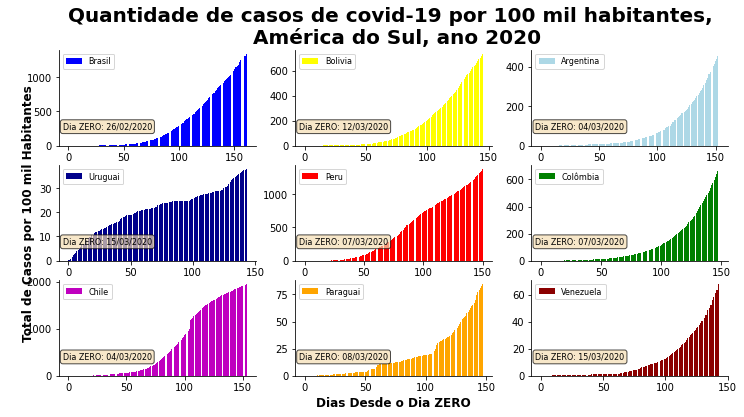

In [80]:
fig1 = plt.figure(figsize=(12,6))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)

# BRASIL
ax = fig1.add_subplot(331)
my_bar_plots(brazil_df, 'Cases', 'blue', 'Brasil', '26/02/2020')

# BOLIVIA
ax = fig1.add_subplot(332)
my_bar_plots(bolivia_df, 'Cases', 'yellow', 'Bolivia', '12/03/2020')
ax.set_title('Quantidade de casos de covid-19 por 100 mil habitantes, \n América do Sul, ano 2020',
             fontsize=20, weight='bold')

# ARGENTINA
ax = fig1.add_subplot(333)
my_bar_plots(argentina_df, 'Cases', 'lightblue', 'Argentina', '04/03/2020')

# URUGUAI
ax = fig1.add_subplot(334)
my_bar_plots(uruguai_df, 'Cases', 'darkblue', 'Uruguai', '15/03/2020')
ax.set_ylabel('\nTotal de Casos por 100 mil Habitantes', weight='bold', fontsize=12)

# PERU
ax = fig1.add_subplot(335)
my_bar_plots(peru_df, 'Cases', 'red', 'Peru', '07/03/2020')

# COLÔMBIA
ax = fig1.add_subplot(336)
my_bar_plots(colombia_df, 'Cases', 'green', 'Colômbia', '07/03/2020')

# CHILE
ax = fig1.add_subplot(337)
my_bar_plots(chile_df, 'Cases', 'm', 'Chile', '04/03/2020')

# PARAGUAI
ax = fig1.add_subplot(338)
my_bar_plots(paraguai_df, 'Cases', 'orange', 'Paraguai', '08/03/2020')
ax.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)

# VENEZUELA
ax = fig1.add_subplot(339)
my_bar_plots(venezuela_df, 'Cases', 'darkred', 'Venezuela', '15/03/2020')

plt.show()
#fig1.savefig("casos_100milAmericaSul-2020.08.05.png", bbox_inches='tight', dpi=600)

## Novos Casos

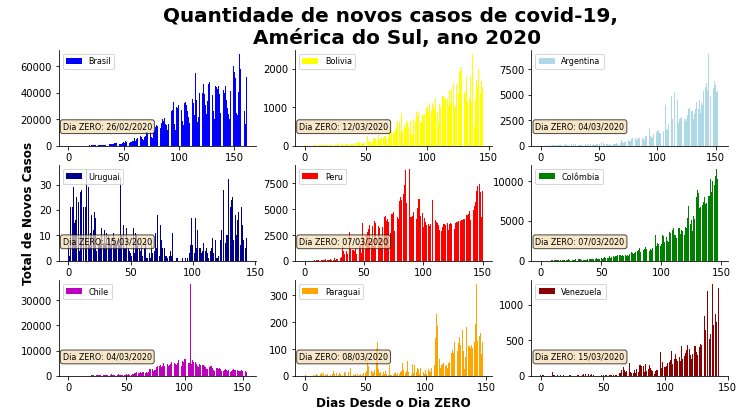

In [82]:
fig2 = plt.figure(figsize=(12,6))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)

# BRASIL
ax = fig2.add_subplot(331)
my_bar_plots(brazil_df, 'new_cases', 'blue', 'Brasil', '26/02/2020')

# BOLIVIA
ax = fig2.add_subplot(332)
my_bar_plots(bolivia_df, 'new_cases', 'yellow', 'Bolivia', '12/03/2020')
ax.set_title('Quantidade de novos casos de covid-19, \n América do Sul, ano 2020',
             fontsize=20, weight='bold')

# ARGENTINA
ax = fig2.add_subplot(333)
my_bar_plots(argentina_df, 'new_cases', 'lightblue', 'Argentina', '04/03/2020')

# URUGUAI
ax = fig2.add_subplot(334)
my_bar_plots(uruguai_df, 'new_cases', 'darkblue', 'Uruguai', '15/03/2020')
ax.set_ylabel('\nTotal de Novos Casos', weight='bold', fontsize=12)

# PERU
ax = fig2.add_subplot(335)
my_bar_plots(peru_df, 'new_cases', 'red', 'Peru', '07/03/2020')

# COLÔMBIA
ax = fig2.add_subplot(336)
my_bar_plots(colombia_df, 'new_cases', 'green', 'Colômbia', '07/03/2020')

# CHILE
ax = fig2.add_subplot(337)
my_bar_plots(chile_df, 'new_cases', 'm', 'Chile', '04/03/2020')

# PARAGUAI
ax = fig2.add_subplot(338)
my_bar_plots(paraguai_df, 'new_cases', 'orange', 'Paraguai', '08/03/2020')
ax.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)

# VENEZUELA
ax = fig2.add_subplot(339)
my_bar_plots(venezuela_df, 'new_cases', 'darkred', 'Venezuela', '15/03/2020')


#plt.show()
fig2.savefig("novos-casosAmericaSul-global-2020.08.05.png", bbox_inches='tight', dpi=600)
